In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("C:/Users/John Wafula/Downloads/diabetes (2).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Data Info :

In [7]:
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


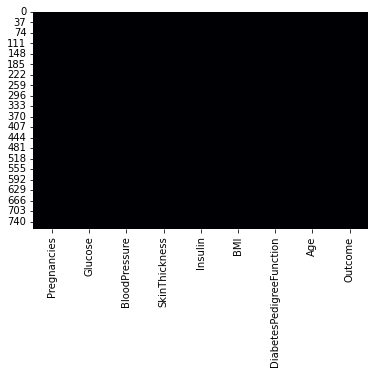

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


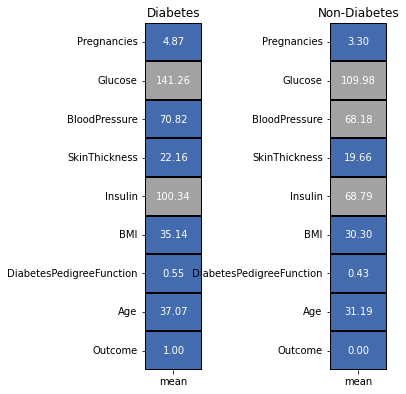

In [8]:
colors = ['#446BAD','#A2A2A2']

diabetes = data[data['Outcome'] == 1].describe().T
non_diabetes = data[data['Outcome'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Diabetes');

plt.subplot(1,2,2)
sns.heatmap(non_diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Non-Diabetes');

fig.tight_layout(pad = -1)

- **Mean** values of all the features for cases of diabetes and non-daibetes.
- Average number of **Pregnancies** detected for diabetes and non-diabetes cases is **4.87** & **3.30** respectively.
- Average **Glucose** values for diabetes cases, **141.26**, is more than those found in non-diabetes cases, **109.98**. This feature can form as a good indicator to predict the cases of diabetes.
- There is no significant difference in the average values of **BloodPressure** and **SkinThickness** between diabetes and non-diabetes cases. 
- Just like **Glucose**, diabetes cases have higher average **Insulin** level, **100.34**, than non-diabetes cases, **68.79**.
- **BMI** is another feature that has higher values for diabetes cases than non-diabetes cases with **35.14** and **30.30** values respectively.
- Average **DiabetesPedigreeFunction** is slightly higher in diabetes cases, **0.55**, than non-diabetes cases, **0.43**.
- Mean **Age** values for cases of diabetes is **37.07** whereas that for non-diabetes cases is **31.19**.
- From these mean values, we can say that some of the features display a clear cut difference between cases of diabetes and non-diabetes, however other features might require more effort to find their relationship with the target variable.

### Dividing features into Numerical and Categorical :

In [9]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Outcome
Numerical Features : Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

### Categorical Features :

#### Distribution of Categorical Features :

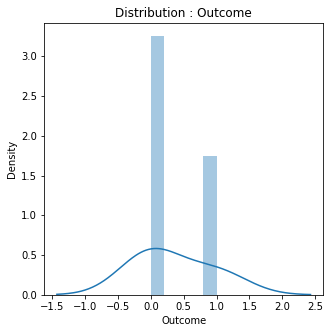

In [11]:
plt.figure(figsize = (5,5))
sns.distplot(data[categorical_features[0]],kde_kws = {'bw' : 1});
title = 'Distribution : ' + categorical_features[0]
plt.title(title);

- **Outcome** displays a **Normally Distributed** data.

### Numerical Features :

#### Distribution of Numerical Features :

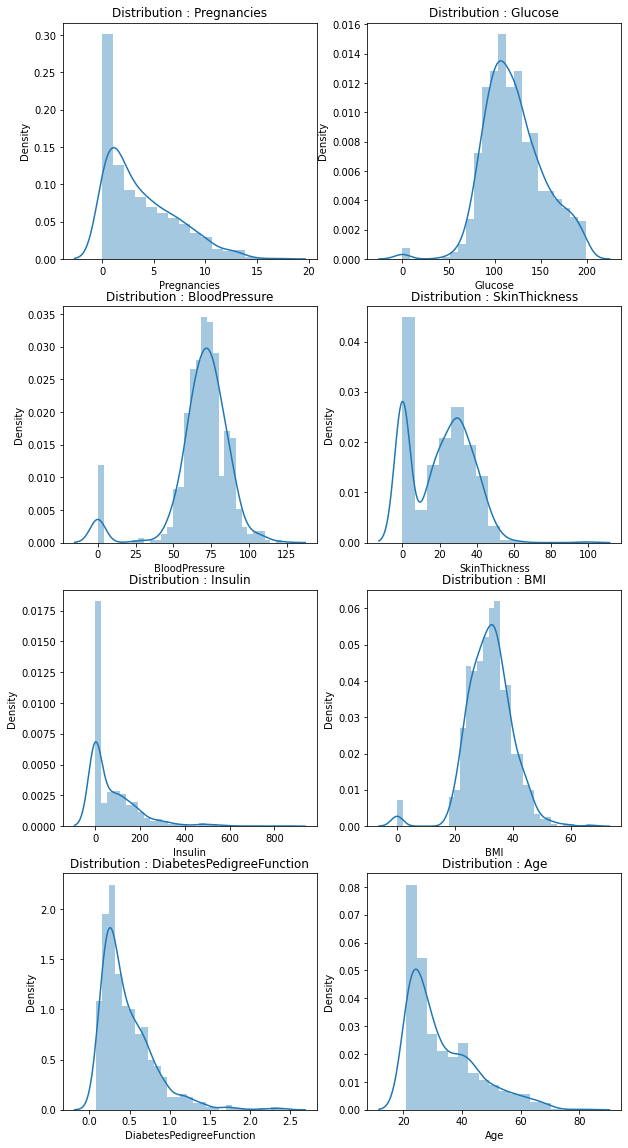

In [12]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (10,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Pregnancies**, **Insulin**, **DiabetesPedigreeFunction** and **Age** have **positively or rightly** skewed data distribution.
- **BloodPressure** and **Skin Thickness** display a **bidmodal data distribution**. 
- Data distributions of **Glucose** & **BMI** are a bit tricky. This is because they near about highlight a **normal distribution** or **bimodal distribution**. This is because of the small peak present at the value **0**.
- For this notebook, we will consider these distributions as **bimodal**.

### Target Variable Visualization (Outcome) : 

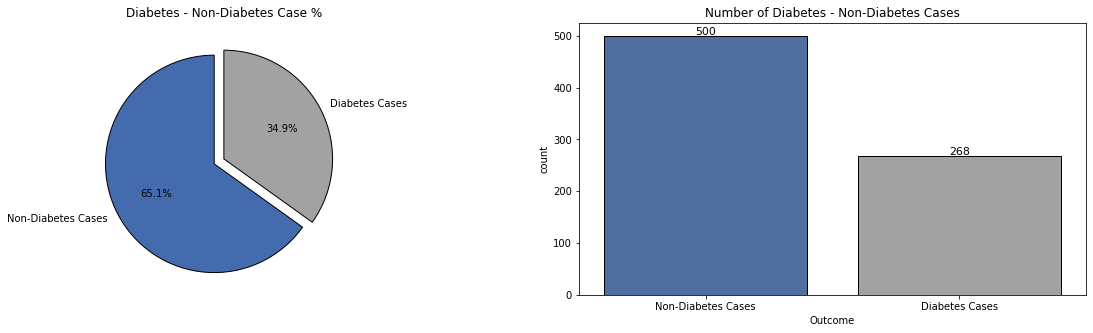

In [13]:
l = list(data['Outcome'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Non-Diabetes Cases','Diabetes Cases'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes - Non-Diabetes Case %');

plt.subplot(1,2,2)
ax = sns.countplot('Outcome',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Non-Diabetes Cases','Diabetes Cases'])
    
plt.title('Number of Diabetes - Non-Diabetes Cases');
plt.show()

- The dataset is **unbalanced** in a **2 : 1** ratio for **Non-Diabetes : Diabetes** cases!
- Due to this, predictions will be biased towards **Non-Diabetes** cases.
- Visualizations will also display this bias, thus making it difficult to gain insights.

### Numerical Features w.r.t Target Variable (Outcome) :

- Some of the numerical_features have too many unique values present in them. Thus, while visualizing, it was difficult to gain any insight from it.
- Hence, we divide the features into 2 parts only for visualization purposes : 
     - Part 1 Features : **Pregnancies**, **BloodPressure**, **SkinThickness**, **Age**
     - Part 2 Features : **Glucose**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**

In [14]:
l1 = ['Pregnancies','BloodPressure','SkinThickness','Age']
l2 = [i for i in numerical_features if i not in l1]
print('Part 1 Features : ',*l1)
print('Part 2 Features : ',*l2)

Part 1 Features :  Pregnancies BloodPressure SkinThickness Age
Part 2 Features :  Glucose Insulin BMI DiabetesPedigreeFunction


#### Visualizing Part 1 Features w.r.t Outcome :

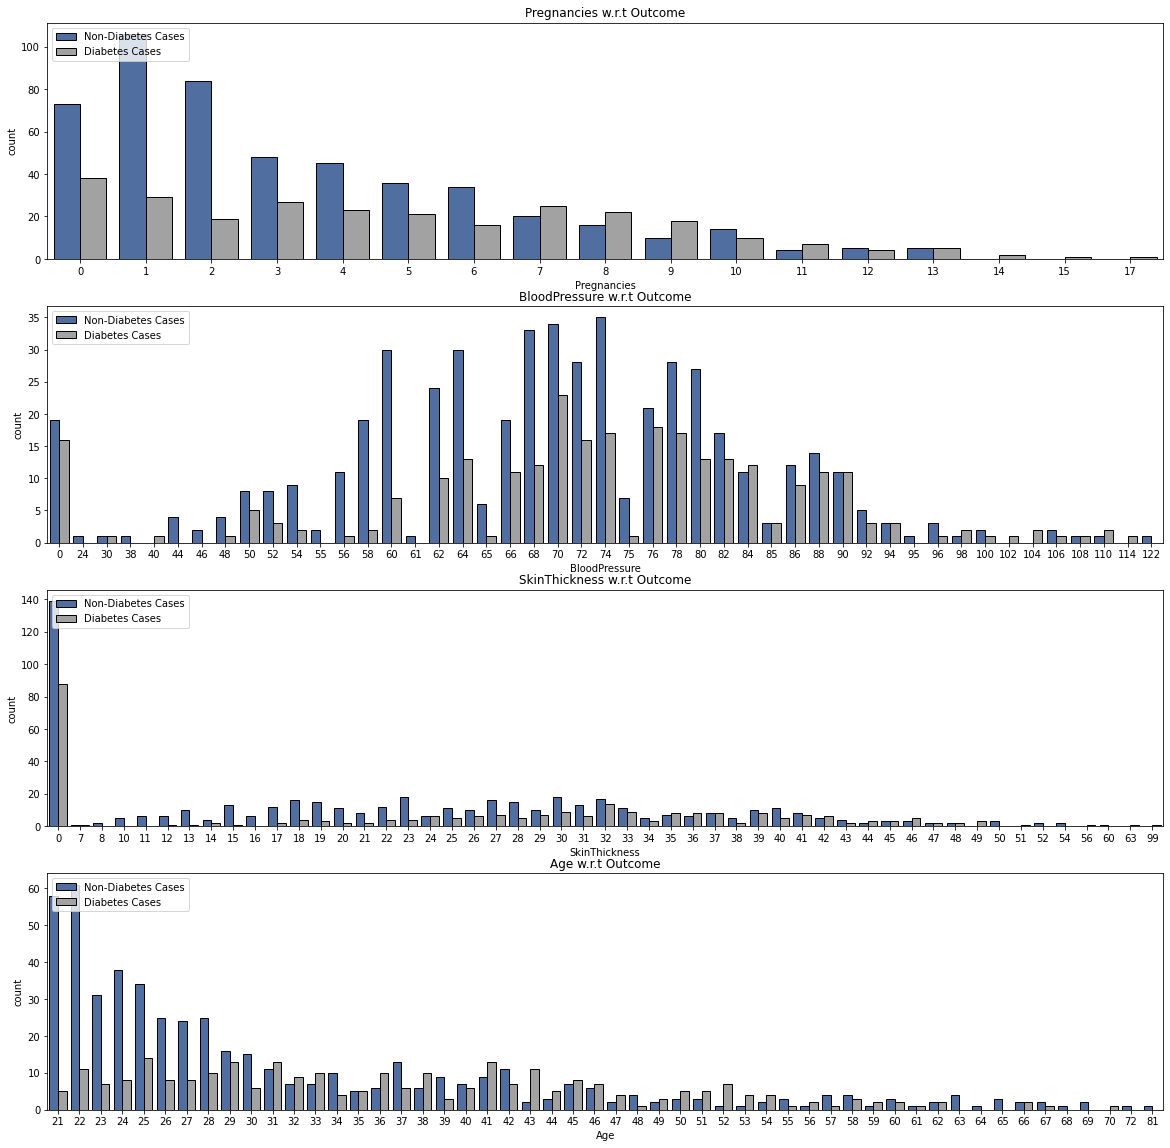

In [15]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,20))
for i in range(len(l1)):
    plt.subplot(4,1,i+1)
    sns.countplot(l1[i],data = data,hue = "Outcome",palette = colors,edgecolor = 'black')
    plt.legend(['Non-Diabetes Cases','Diabetes Cases'],loc = 'upper left')
    title = l1[i] + ' w.r.t Outcome'
    plt.title(title);

- For **Pregnancies**, cases of diabetes is present throughout the data. There is no specific range of values for which higher diabetes cases are found. **Pregnancies** range of values from **7 - 9** does highlight more cases of diabetes than non-diabetes for the 1st indicating a pattern but this claim gets rejected if we observe the values ahead.
- **BloodPressure** range of values **60 - 90 mm/hg** highlights a high number of diabetes patients.
- **SkinThickness** displays very low number of diabetes cases for all the values. Out of those values, **24 - 42** has some prominent peaks of diabetes cases.
- When it comes to **Age**, young females are more prone to diabetes than older women. As the age increases, the number of diabetes cases have decreased. **Age** group **21 - 50** displays a higher probability of being diagnosed with diabetes.

#### Visualizing Part 2 Features w.r.t Outcome :

- Because of too many unique data points in the **Part 2 Features**, we will convert them into categorical features for understandable visualization and gaining insights purposes. 
- Thus, we scale down the values of these features and bring the varied data points to a constant value. It represents a range of values.
- Here, we divide the data points of the numerical features and assign the resulting value as the representative constant for that data point. The scaling constants of 5, 10 & 100 are decided by looking into the data & intuition. 

In [16]:
data['Glucose_Group'] = [ int(i / 5) for i in data['Glucose']]
data['Insulin_Group'] = [ int(i / 50) for i in data['Insulin']]
data['BMI_Group'] = [ int(i / 5) for i in data['BMI']]
data['DiabetesPedigreeFunction_Group'] = [ int((i*100) / 5) for i in data['DiabetesPedigreeFunction']]

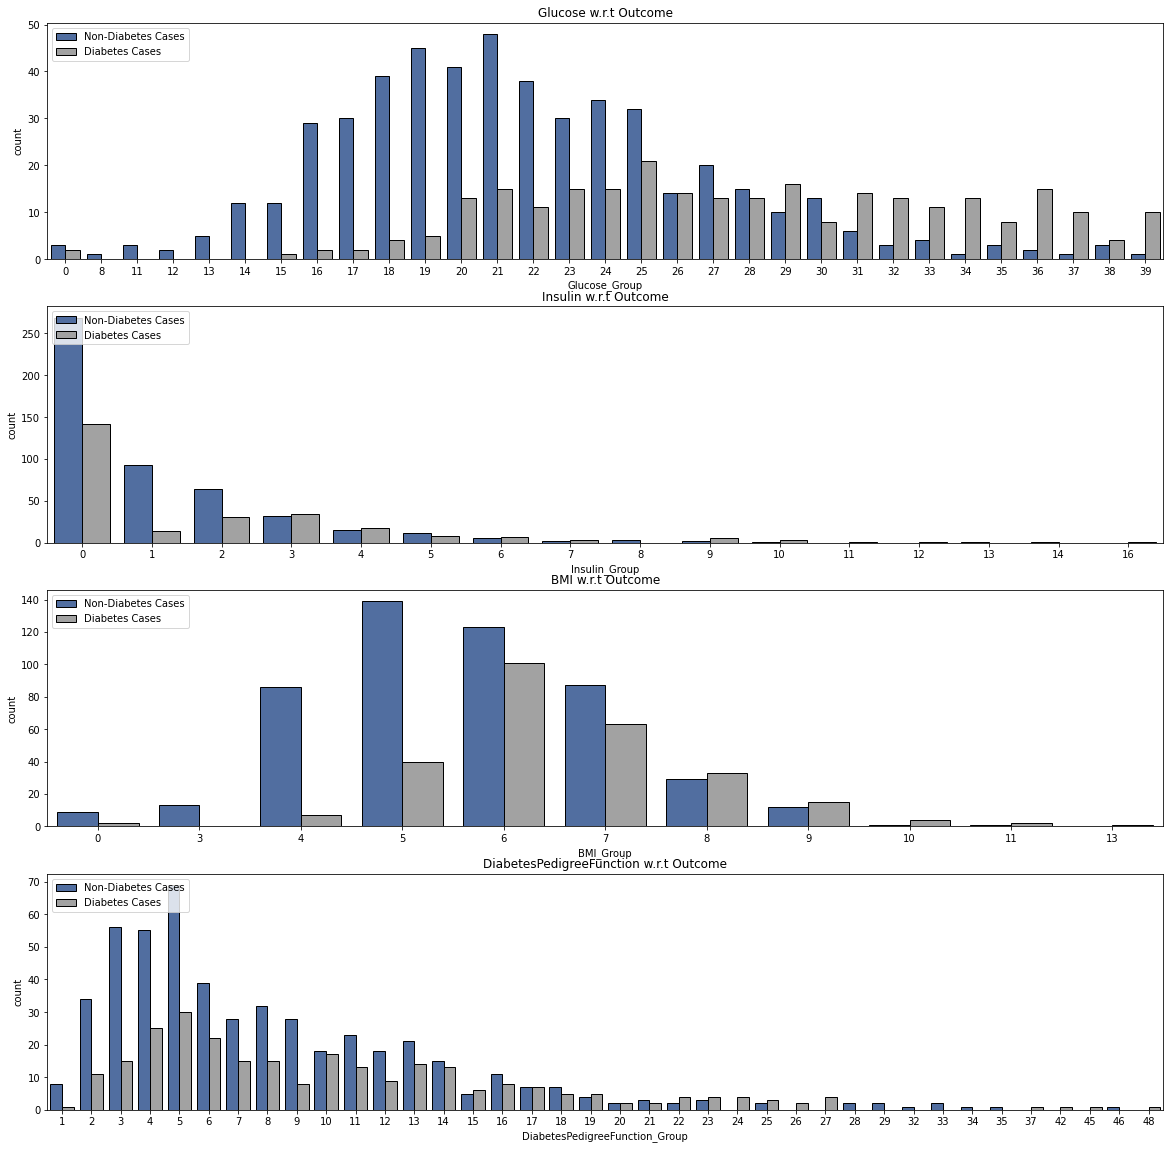

In [17]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,20))

group_numerical_features = [i + '_Group' for i in l2]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(group_numerical_features[i],data = data,hue = "Outcome",palette = colors,edgecolor = 'black')
    plt.legend(['Non-Diabetes Cases','Diabetes Cases'],loc = 'upper left')
    title = l2[i] + ' w.r.t Outcome'
    plt.title(title);

- From the **Glucose** group data, early values display very low number of diabetes cases. Cases then increase and become constant starting from **100** (20x5) - **195** (39x5).
- **Insulin** levels between **0** (0x50) - **300 mu U/ml** (6x10)  are highly susceptible to diabetes. **Insulin**'s data distribution displays a high number of diabetes cases for value **0**. This is probably because of the no data recorded for those females.
- For the **BMI** readings, diabetes cases have a higher probability for the range of values from **20** (4x5) - **45 kg/m^2** (9x5). 
- **DiabetesPedigreeFunction** values also display positive diabetes cases throughout. **0.1** (2x5/100) - **1.25** (25x5/100)  range of values have detected higher number of diabetes cases.

### Numerical features vs Numerical features w.r.t Target variable (Outcome) :

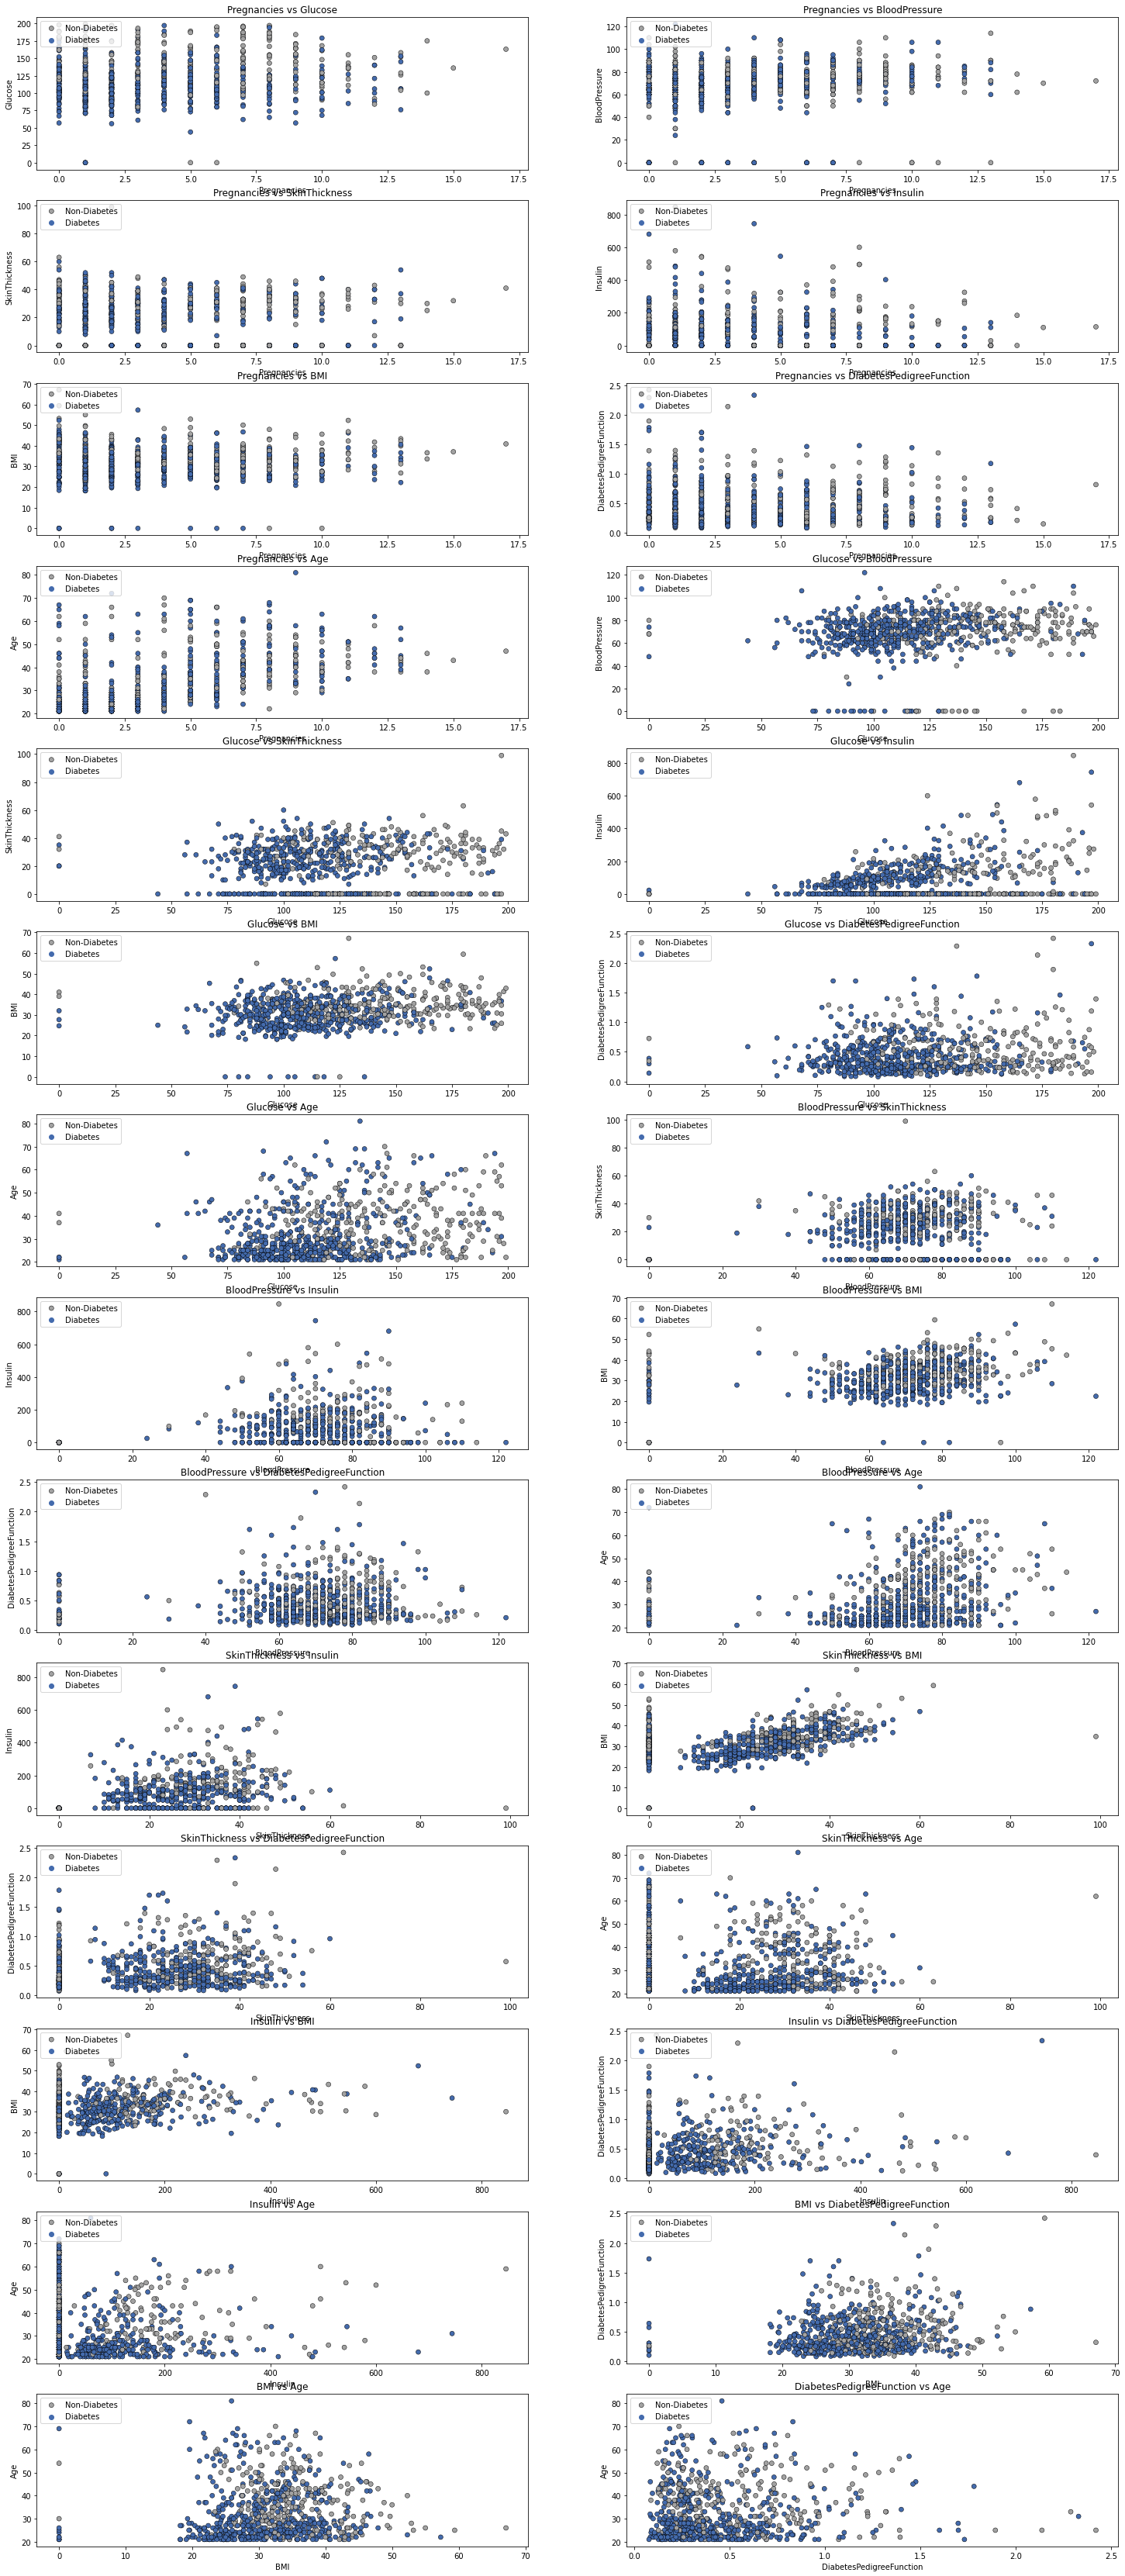

In [18]:
a = 0
fig,ax = plt.subplots(nrows = 14,ncols = 2,figsize = (25,60))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(14,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'Outcome',palette = colors,edgecolor = 'black');
            plt.legend(['Non-Diabetes','Diabetes'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- **Pregnancies** with values between **7 - 10** have high chances of diabetes. This range does not display a complete dominance but it has some presence.
- **Glucose** values higher than **125** indicate very high chances of diabetes.
- **BloodPressure** values between **60 - 100** highlight many cases of diabetes coupled with any feature.
- When both, **BMI** and **SkinThickness**, feature values are between **20 - 50**, probability of diabetes is very high.
- **Insulin** values between **0 - 300** increases the risk of diabetes. When above **400**, the female has a sure shot chance of being diabetic. 
- For **Age** group of **20 - 50** as well as **DiabetesPedigreeFunction** values ranging from **0 - 1.5** results in a diabetic condition.

### Data Scaling :

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1 = data.copy(deep = True)
df1.drop(columns = ['Glucose_Group','Insulin_Group','BMI_Group','DiabetesPedigreeFunction_Group'],inplace = True)

df1['Pregnancies'] = mms.fit_transform(df1[['Pregnancies']])
df1['Insulin'] = ss.fit_transform(df1[['Insulin']])
df1['DiabetesPedigreeFunction'] = ss.fit_transform(df1[['DiabetesPedigreeFunction']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['BloodPressure'] = ss.fit_transform(df1[['BloodPressure']])
df1['SkinThickness'] = ss.fit_transform(df1[['SkinThickness']])
df1['Glucose'] = ss.fit_transform(df1[['Glucose']])
df1['BMI'] = ss.fit_transform(df1[['BMI']])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.35,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1
1,0.06,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,0
2,0.47,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1
3,0.06,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,0
4,0.00,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Pregnancies**, **Insulin**, **DiabetesPedigreeFunction** and **Age** features are normalized as they displayed a right skewed data distribution. **BloodPressure**, **Skin Thickness**, **Glucose** & **BMI** highlight a bidmodal data distribution.

- **Standardization** : None of the features are standardized for the above data.

### Correlation Matrix :

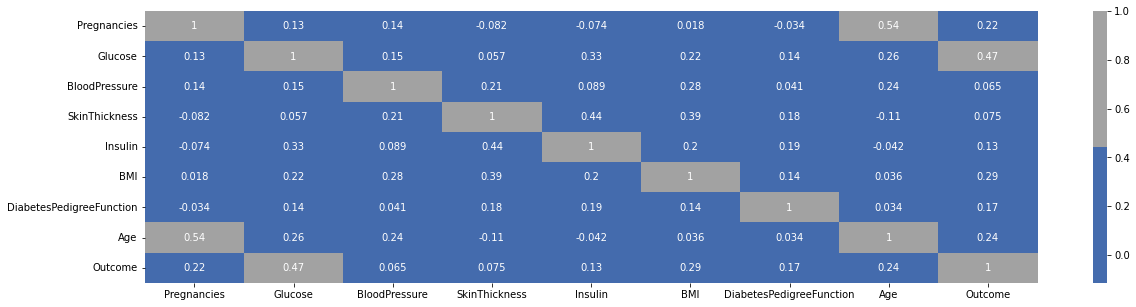

In [20]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **Outcome**. 

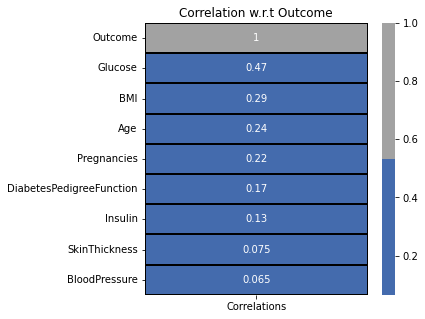

In [21]:
corr = df1.corrwith(df1['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- **SkinThickness** and **BloodPressure** does not display any kind of correlation.
- **Glucose** displays the highest positive correlation with **Outcome**. It is followed by **BMI**, **Age**, **Pregnancies**, **DiabetesPedigreeFunction** & **Insulin**!

### Feature Selection for Numerical Features :

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### ANOVA Test :

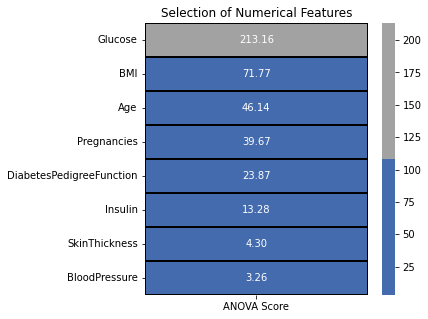

In [23]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the **ANOVA test**, **higher the value of the ANOVA score, more is the importance of the feature**.
- From the above results, we need to drop **SkinThickness** & **BloodPressure**. We will take the remaining features into consideration for modeling.

In [24]:
df1.drop(columns = ['SkinThickness','BloodPressure'],inplace = True)
f1 = df1.iloc[:,:6].values
t1 = df1.iloc[:,6].values

df2 = df1.copy(deep = True)
df2.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.35,0.85,-0.69,0.20,0.47,1.43,1
1,0.06,-1.12,-0.69,-0.68,-0.37,-0.19,0
2,0.47,1.94,-0.69,-1.10,0.60,-0.11,1
3,0.06,-1.00,0.12,-0.49,-0.92,-1.04,0
4,0.00,0.50,0.77,1.41,5.48,-0.02,1


- Creating a deep copy of the orginal dataset. 
- This is done in order to highlight the model performances when trained on balanced and unbalanced datasets.

**We will now move onto data balancing!**

### Data Balancing using SMOTE :

In [25]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [26]:
over = SMOTE()
f2 = df1.iloc[:,:6].values
t2 = df1.iloc[:,6].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({1: 500, 0: 500})

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [28]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.25, random_state = 2) # Unbalanced
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.25, random_state = 2) # Balanced

- Selecting the features from the above conducted tests and splitting the data into **75 - 25 train - test** groups.

In [29]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Xgboost Classifier :

In [30]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

- #### Unbalanced Dataset : 

Cross Validation Score :  83.60%
ROC_AUC Score :  67.16%


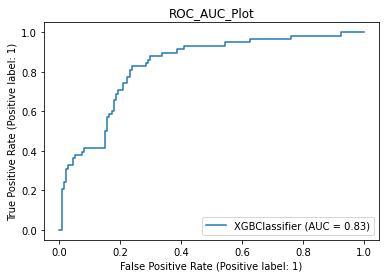

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       134
           1       0.58      0.50      0.54        58

    accuracy                           0.74       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.73      0.74      0.73       192



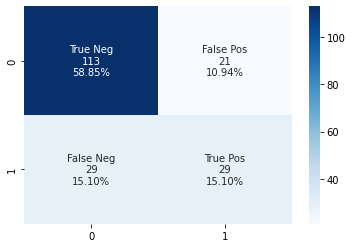

In [31]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

- #### Balanced Dataset : 

Cross Validation Score :  86.71%
ROC_AUC Score :  78.60%


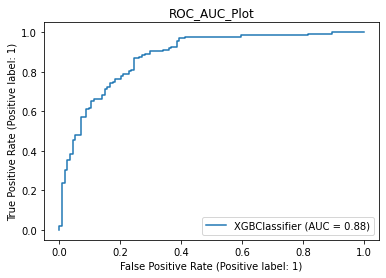

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       114
           1       0.80      0.81      0.81       136

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



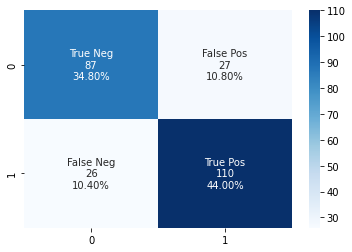

In [32]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

#### 2] LightGBM Classifier :

In [33]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

- #### Unbalanced Dataset :

Cross Validation Score :  82.36%
ROC_AUC Score :  64.20%


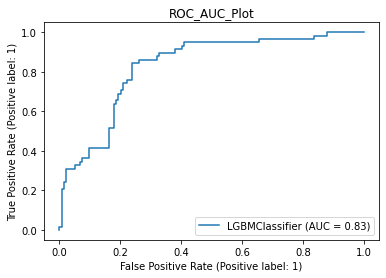

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       134
           1       0.54      0.45      0.49        58

    accuracy                           0.72       192
   macro avg       0.66      0.64      0.65       192
weighted avg       0.71      0.72      0.71       192



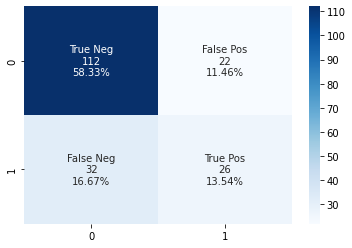

In [34]:
model(classifier_lgbm,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lgbm,x_test1,y_test1)

- #### Balanced Dataset :

Cross Validation Score :  86.21%
ROC_AUC Score :  77.43%


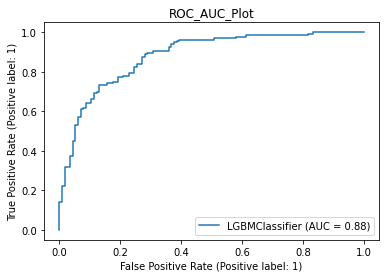

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       114
           1       0.79      0.79      0.79       136

    accuracy                           0.78       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.78      0.78      0.78       250



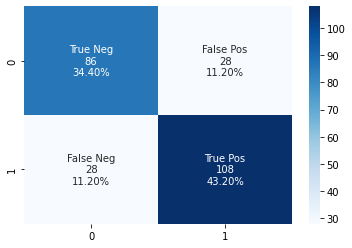

In [35]:
model(classifier_lgbm,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lgbm,x_test2,y_test2)

#### 3] Stack of XGBClassifier and LightGBMClassifier :

In [36]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm)],
                           final_estimator = classifier_lgbm)

- #### Unbalanced Dataset :

Cross Validation Score :  80.15%
ROC_AUC Score :  65.70%


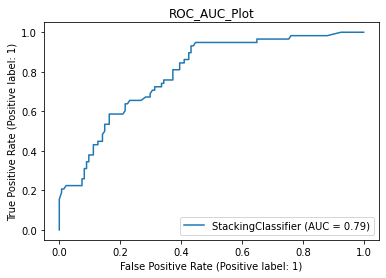

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       134
           1       0.59      0.45      0.51        58

    accuracy                           0.74       192
   macro avg       0.69      0.66      0.67       192
weighted avg       0.73      0.74      0.73       192



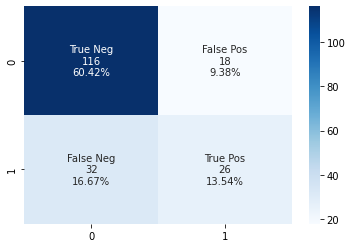

In [37]:
model(stack,x_train1,y_train1,x_test1,y_test1)
model_evaluation(stack,x_test1,y_test1)

- #### Balanced Dataset : 

Cross Validation Score :  84.35%
ROC_AUC Score :  75.88%


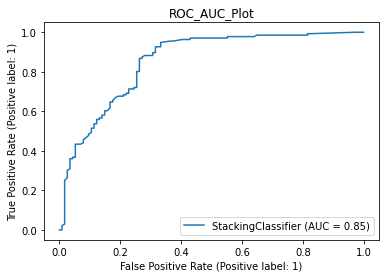

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       114
           1       0.78      0.77      0.78       136

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



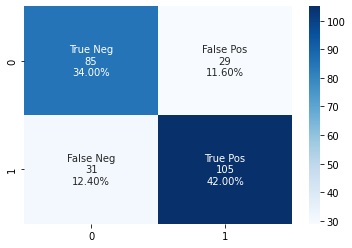

In [38]:
model(stack,x_train2,y_train2,x_test2,y_test2)
model_evaluation(stack,x_test2,y_test2)

### Alogrithm Results Table :


#### Unbalanced Dataset :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|
|-|-|-|-|
|1|XGBClassifier|83.60%|67.16%|
|2|LightGBMClassifier|82.36%|64.20%|
|3|Stack of XGBClassifier & LightGBMClassifier|80.15%|65.70%|

#### Balanced Dataset :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|
|-|-|-|-|
|1|XGBClassifier|86.71%|78.60%|
|2|LightGBMClassifier|86.21%|77.43%|
|3|Stack of XGBClassifier & LightGBMClassifier|84.35%|75.88%|